In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 


In [2]:
data = """Look, I was gonna go easy on you and not to hurt your feelings \n But I'm only going to get this one chance \nSomething's wrong, I can feel it (Six minutes, Slim Shady, you're on) \nJust a feeling I've got, like something's about to happen, but I don't know what \nIf that means, what I think it means, we're in trouble, big trouble, \nAnd if he is as bananas as you say, I'm not taking any chances \nYou were just what the doctor ordered \nI'm beginning to feel like a Rap God, Rap God \nAll my people from the front to the back nod, back nod \nNow who thinks their arms are long enough to slap box, slap box? \nThey said I rap like a robot, so call me Rapbot \nBut for me to rap like a computer must be in my genes \nI got a laptop in my back pocket \nMy pen'll go off when I half-cock it \nGot a fat knot from that rap profit \nMade a living and a killing off it \nEver since Bill Clinton was still in office \nWith Monica Lewinsky feeling on his nut-sack \nI'm an MC still as honest \nBut as rude and indecent as all hel yllables, killaholic (Kill 'em all with) \nThis slickety, gibbedy, hibbedy hip hop \nYou don't really wanna get into a pissing match with this rappidy brat \nPacking a Mac in the back of the Ac, backpack rap crap, yep, yackidy-yac \nAnd at the exact same time I attempt these lyrical acrobat stunts while I'm practicing \nThat I'll still be able to break a motherfuckin' table \nOver the back of a couple of faggots and crack it in half \nOnly realized it was ironic I was signed to Aftermath after the fact \nHow could I not blow? All I do is drop F-bombs, feel my wrath of attack \nRappers are having a rough time period, here's a Maxipad \nIt's actually disastrously bad \nFor the wack while I'm masterfully constructing this masterpiece as \nI'm beginning to feel like a Rap God, Rap God \nAll my people from the front to the back nod, back nod \nNow who thinks their arms are long enough to slap box, slap box? \nLet me show you maintaining this shit ain't that hard, that hard \nEverybody want the key and the secret t ap immortality like I have got \nWell, to be truthful the blueprint's simply rage and youthful exuberance \nEverybody loves to root for a nuisance \nHit the earth like an asteroid, did nothing but shoot for the moon since \nMC's get taken to school with this music \n'Cause I use it as a vehicle to bus the rhyme \nNow I lead a new school full of students \nMe? I'm a product of Rakim, Lakim Shabazz, 2Pac N- \n-W.A, Cube, hey, Doc, Ren, Yella, Eazy, thank you, they got Slim \nInspired enough to one day grow up, blow up and be in a position \nTo meet Run DMC and induct them into the motherfuckin' Rock n' \nRoll Hall of Fame \nEven though I walk in the church and burst in a ball of flames \nOnly Hall of Fame I be inducted in is the alcohol of fame \nOn the wall of shame \nYou fags think it's all a game 'til I walk a flock of flames \nOff of planking, tell me what in the fuck are you thinking? \nLittle gay looking boy \nSo gay I can barely say it with a straight face looking boy \nYou witnessing a mass occur \nLike ou watching a church gathering take place looking boy \nOy vey, that boy's gay, that's all they say looking boy \nYou get a thumbs up, pat on the back \nAnd a "way to go" from your label everyday looking boy \nHey, looking boy, what you say looking boy? \nI got a "hell yeah" from Dre looking boy \nI'mma work for everything I have \nNever ask nobody for shit, get outta my face looking boy \nBasically boy you're never gonna be capable \nTo keep up with the same pace looking boy \n'Cause I'm beginning to feel like a Rap God, Rap God \nAll my people from the front to the back nod, back nod \nThe way I'm racing around the track, call me Nascar, Nascar \nDale Earnhardt of the trailer park, the White Trash God \nKneel before General Zod this planet's Krypton, no Asgard, Asgard \nSo you be Thor and I'll be Odin, you rodent, I'm omnipotent \nLet off then I'm reloading immediately with these bombs I'm totin' \nAnd I should not be woken \nI'm the walking dead, but I'm just a talking head, a zombie floating \nBut I got yur mom deep throating \nI'm out my Ramen noodle, we have nothing in common, poodle \nI'm a doberman, pinch yourself in the arm and pay homage, pupil \nIt's me, my honesty's brutal \nBut it's honestly futile if I don't utilize what I do though \nFor good at least once in a while \nSo I wanna make sure somewhere in this chicken scratch I scribble and doodle \nEnough rhymes to maybe to try and help get some people through tough times \nBut I gotta keep a few punchlines just in case 'cause even you unsigned \nRappers are hungry looking at me like it's lunchtime \nI know there was a time where once I \nWas king of the underground, but I still rap like I'm on my Pharoahe Monch grind \nSo I crunch rhymes, but sometimes when you combine \nAppeal with the skin color of mine \nYou get too big and here they come trying to \n Censor you like that one line I said on "I'm Back" from the Mathers LP \n One when I tried to say "I'll take seven kids from Columbine \nPut 'em all in a line, add an AK-47, a revolver and a nine" \ See if I get away with it now that I ain't as big as I was, but I'm \nMorphin' into an immortal coming through the portal \nYou're stuck in a time warp from 2004 though \nAnd I don't know what the fuck that you rhyme for \nYou're pointless as Rapunzel with fucking cornrows \nYou write normal, fuck being normal \nAnd I just bought a new Raygun from the future \nJust to come and shoot ya like when Fabolous made Ray J mad \n'Cause Fab said he looked like a fag at Maywhether's pad \nSingin' to a man while they played piano \nMan, oh man, that was a 24/7 special on the cable channel \nSo Ray J went straight to the radio station the very next day \n"Hey, Fab, I'mma kill you" \nLyrics coming at you at supersonic speed, (JJ Fad) \nUh, sama lamaa duma lamaa you assuming I'm a human \nWhat I gotta do to get it through to you I'm superhuman \nInnovative and I'm made of rubber \nSo that anything you say is ricocheting off of me and it'll glue to you \nI'm devastating, more than ever demonstrating \nHow to give a motherfukin' audience a feeling like it's levitating \nNever fading, and I know that the haters are forever waiting \nFor the day that they can say I fell off, they'd be celebrating \n'Cause I know the way to get 'em motivated \nI make elevating music, you make elevator music \nOh, he's too mainstream \nWell, that's what they do when they get jealous, they confuse it \nIt's not hip hop, it's pop, 'cause I found a hella way to fuse it \nWith rock, shock rap with Doc \nThrow on Lose Yourself and make 'em lose it \nI don't know how to make songs like that \nI don't know what words to use \nLet me know when it occurs to you \nWhile I'm ripping any one of these verses diverse as you \nIt's curtains, I'm inadvertently hurtin' you \nHow many verses I gotta murder to \nProve that if you were half as nice, your songs you can sacrifice virgins too uh! \nSchool flunkie, pill junky \nBut look at the accolades the skills brung me \nFull of myself, but still hungry \nI bully myself 'cause I make me do what I put my mind to \nAnd Im a million leagues above you, ill when I speak in tongues \nBut it's still tongue in cheek, fuck you \nI'm drunk so Satan take the fucking wheel, I'm asleep in the front seat \nBumping Heavy D and the Boys, still chunky, but funky \nBut in my head there's something I can feel tugging and struggling \nAngels fight with devils and, here's what they want from me \nThey asking me to eliminate some of the women hate \nBut if you take into consideration the bitter hatred I have \nThen you may be a little patient and more sympathetic to the situation \nAnd understand the discrimination \nBut fuck it, life's handing you lemons, make lemonade then \nBut if I can't batter the women how the fuck am I supposed to bake them a cake then? \nDon't mistake it for Satan \nIt's a fatal mistake if you think I need to be overseas \nAnd take a vacation to trip a broad \nAnd make her fall on her face and don't be a retard \nBe a king? Think not, why be a king when you can be a God? \n"""

In [3]:
tokenizer = Tokenizer()

In [4]:
#To create Python List of sentences and convert them into lower cases

corpus = data.lower().split("\n")

In [5]:
corpus

['look, i was gonna go easy on you and not to hurt your feelings ',
 " but i'm only going to get this one chance ",
 "something's wrong, i can feel it (six minutes, slim shady, you're on) ",
 "just a feeling i've got, like something's about to happen, but i don't know what ",
 "if that means, what i think it means, we're in trouble, big trouble, ",
 "and if he is as bananas as you say, i'm not taking any chances ",
 'you were just what the doctor ordered ',
 "i'm beginning to feel like a rap god, rap god ",
 'all my people from the front to the back nod, back nod ',
 'now who thinks their arms are long enough to slap box, slap box? ',
 'they said i rap like a robot, so call me rapbot ',
 'but for me to rap like a computer must be in my genes ',
 'i got a laptop in my back pocket ',
 "my pen'll go off when i half-cock it ",
 'got a fat knot from that rap profit ',
 'made a living and a killing off it ',
 'ever since bill clinton was still in office ',
 'with monica lewinsky feeling on h

In [6]:
#To create a dictionary of words
#key: words | values: token of that word

tokenizer.fit_on_texts(corpus) 

In [7]:
total_words = len(tokenizer.word_index)+1

In [8]:
# TOtal number of words in RapGOd

total_words

620

In [9]:
tokenizer.word_index

{'a': 1,
 'i': 2,
 'the': 3,
 'to': 4,
 'you': 5,
 'and': 6,
 "i'm": 7,
 'in': 8,
 'of': 9,
 'but': 10,
 'it': 11,
 'like': 12,
 'be': 13,
 'that': 14,
 'me': 15,
 'my': 16,
 'with': 17,
 'what': 18,
 'as': 19,
 'rap': 20,
 'get': 21,
 'from': 22,
 'back': 23,
 'they': 24,
 "it's": 25,
 'looking': 26,
 'boy': 27,
 'on': 28,
 'for': 29,
 'all': 30,
 'was': 31,
 'this': 32,
 "don't": 33,
 'know': 34,
 'if': 35,
 'god': 36,
 'so': 37,
 'when': 38,
 'make': 39,
 'got': 40,
 'say': 41,
 'still': 42,
 'at': 43,
 "'cause": 44,
 'not': 45,
 'can': 46,
 'feel': 47,
 'just': 48,
 'nod': 49,
 'are': 50,
 'off': 51,
 'fuck': 52,
 'one': 53,
 'while': 54,
 'how': 55,
 'do': 56,
 'take': 57,
 "you're": 58,
 'think': 59,
 'is': 60,
 'people': 61,
 'front': 62,
 'now': 63,
 'enough': 64,
 'slap': 65,
 'box': 66,
 'an': 67,
 "'em": 68,
 'into': 69,
 'time': 70,
 'have': 71,
 'up': 72,
 'way': 73,
 'then': 74,
 'go': 75,
 'your': 76,
 'only': 77,
 'feeling': 78,
 'big': 79,
 'beginning': 80,
 'said': 81

__Training the data__


In [10]:
input_sequences = []

In [11]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]  #generating token for each line in corpus
    
    for i in range(1, len(token_list)):
        
        n_gram_sequence = token_list[:i+1]
        
        # N-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text.
        
        input_sequences.append(n_gram_sequence)

In [12]:
input_sequences


[[101, 2],
 [101, 2, 31],
 [101, 2, 31, 102],
 [101, 2, 31, 102, 75],
 [101, 2, 31, 102, 75, 182],
 [101, 2, 31, 102, 75, 182, 28],
 [101, 2, 31, 102, 75, 182, 28, 5],
 [101, 2, 31, 102, 75, 182, 28, 5, 6],
 [101, 2, 31, 102, 75, 182, 28, 5, 6, 45],
 [101, 2, 31, 102, 75, 182, 28, 5, 6, 45, 4],
 [101, 2, 31, 102, 75, 182, 28, 5, 6, 45, 4, 183],
 [101, 2, 31, 102, 75, 182, 28, 5, 6, 45, 4, 183, 76],
 [101, 2, 31, 102, 75, 182, 28, 5, 6, 45, 4, 183, 76, 184],
 [10, 7],
 [10, 7, 77],
 [10, 7, 77, 185],
 [10, 7, 77, 185, 4],
 [10, 7, 77, 185, 4, 21],
 [10, 7, 77, 185, 4, 21, 32],
 [10, 7, 77, 185, 4, 21, 32, 53],
 [10, 7, 77, 185, 4, 21, 32, 53, 186],
 [103, 187],
 [103, 187, 2],
 [103, 187, 2, 46],
 [103, 187, 2, 46, 47],
 [103, 187, 2, 46, 47, 11],
 [103, 187, 2, 46, 47, 11, 188],
 [103, 187, 2, 46, 47, 11, 188, 189],
 [103, 187, 2, 46, 47, 11, 188, 189, 104],
 [103, 187, 2, 46, 47, 11, 188, 189, 104, 190],
 [103, 187, 2, 46, 47, 11, 188, 189, 104, 190, 58],
 [103, 187, 2, 46, 47, 11, 18

In [13]:
#Find the length of longest sentence in corpus

max_sequence_length = max([len(x) for x in input_sequences])

In [14]:
#Length of longest Sentence

max_sequence_length

33

In [15]:
#Pad all the sequence of length of the longest sentence to make them all equal
#We are using Pre padding here

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))


In [16]:
input_sequences

array([[  0,   0,   0, ...,   0, 101,   2],
       [  0,   0,   0, ..., 101,   2,  31],
       [  0,   0,   0, ...,   2,  31, 102],
       ...,
       [  0,   0,   0, ...,   5,  46,  13],
       [  0,   0,   0, ...,  46,  13,   1],
       [  0,   0,   0, ...,  13,   1,  36]])

In [17]:
input_sequences.shape

(1402, 33)

In [18]:
#Seperating padded sentences in Xs and Ys(label)
#All the last characters are yS nd remaining are Xs of each line

xs = input_sequences[:,:-1]        #All the characters except the last character
labels = input_sequences[:,-1]  #Extracting the last charater

In [19]:
#Since it is a classification problem We have to ONE HOT ENCODE the Labels
#and then put it in ys
#.tocategorical will create onehotencoding of labels\

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [20]:
ys.shape

#Number Different Words in Song = Number of rows

(1402, 620)

In [21]:
#Sentence

print(tokenizer.word_index['look'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['was'])
print(tokenizer.word_index['gonna'])
print(tokenizer.word_index['go'])
print(tokenizer.word_index['easy'])
print(tokenizer.word_index['on'])
print(tokenizer.word_index['you'])

# Sentence : [101 2 31 102 75 182 28 5]
#here label is 5

101
2
31
102
75
182
28
5


In [22]:
#X : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
              #0   0   0   0   0   0   0 101   2  31 102  75 182  28]

print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 101   2  31 102  75 182  28]


In [23]:
#One hot encoding of label and 1 on position 5

print(ys[6])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [24]:
print(xs[5])
print(ys[5]) #one on pos 28

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 101   2  31 102  75 182]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [25]:
print(tokenizer.word_index)

{'a': 1, 'i': 2, 'the': 3, 'to': 4, 'you': 5, 'and': 6, "i'm": 7, 'in': 8, 'of': 9, 'but': 10, 'it': 11, 'like': 12, 'be': 13, 'that': 14, 'me': 15, 'my': 16, 'with': 17, 'what': 18, 'as': 19, 'rap': 20, 'get': 21, 'from': 22, 'back': 23, 'they': 24, "it's": 25, 'looking': 26, 'boy': 27, 'on': 28, 'for': 29, 'all': 30, 'was': 31, 'this': 32, "don't": 33, 'know': 34, 'if': 35, 'god': 36, 'so': 37, 'when': 38, 'make': 39, 'got': 40, 'say': 41, 'still': 42, 'at': 43, "'cause": 44, 'not': 45, 'can': 46, 'feel': 47, 'just': 48, 'nod': 49, 'are': 50, 'off': 51, 'fuck': 52, 'one': 53, 'while': 54, 'how': 55, 'do': 56, 'take': 57, "you're": 58, 'think': 59, 'is': 60, 'people': 61, 'front': 62, 'now': 63, 'enough': 64, 'slap': 65, 'box': 66, 'an': 67, "'em": 68, 'into': 69, 'time': 70, 'have': 71, 'up': 72, 'way': 73, 'then': 74, 'go': 75, 'your': 76, 'only': 77, 'feeling': 78, 'big': 79, 'beginning': 80, 'said': 81, 'half': 82, 'made': 83, 'these': 84, "i'll": 85, 'let': 86, 'school': 87, 'mus

__Model__


In [26]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

#Softmax because of categorical nature 

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  

In [28]:
history = model.fit(xs, ys, epochs=450, verbose=1)

Train on 1402 samples
Epoch 1/450
1402/1402 [==============================] - 17s 12ms/sample - loss: 6.3651 - accuracy: 0.0221
Epoch 2/450
1402/1402 [==============================] - 1s 380us/sample - loss: 5.8724 - accuracy: 0.0371
Epoch 3/450
1402/1402 [==============================] - 0s 328us/sample - loss: 5.6866 - accuracy: 0.0421
Epoch 4/450
1402/1402 [==============================] - 0s 328us/sample - loss: 5.6522 - accuracy: 0.0464
Epoch 5/450
1402/1402 [==============================] - 0s 332us/sample - loss: 5.6182 - accuracy: 0.0492
Epoch 6/450
1402/1402 [==============================] - 1s 379us/sample - loss: 5.5727 - accuracy: 0.0435
Epoch 7/450
1402/1402 [==============================] - 1s 402us/sample - loss: 5.5248 - accuracy: 0.0535
Epoch 8/450
1402/1402 [==============================] - 1s 364us/sample - loss: 5.4782 - accuracy: 0.0585
Epoch 9/450
1402/1402 [==============================] - 1s 444us/sample - loss: 5.4346 - accuracy: 0.0621
Epoch 10/450
14

1402/1402 [==============================] - 1s 417us/sample - loss: 3.2609 - accuracy: 0.3274
Epoch 77/450
1402/1402 [==============================] - 0s 350us/sample - loss: 3.2314 - accuracy: 0.3295
Epoch 78/450
1402/1402 [==============================] - 1s 366us/sample - loss: 3.2019 - accuracy: 0.3388
Epoch 79/450
1402/1402 [==============================] - 1s 451us/sample - loss: 3.1750 - accuracy: 0.3438
Epoch 80/450
1402/1402 [==============================] - 1s 363us/sample - loss: 3.1472 - accuracy: 0.3474
Epoch 81/450
1402/1402 [==============================] - 0s 336us/sample - loss: 3.1189 - accuracy: 0.3516
Epoch 82/450
1402/1402 [==============================] - 0s 333us/sample - loss: 3.0893 - accuracy: 0.3545
Epoch 83/450
1402/1402 [==============================] - 0s 334us/sample - loss: 3.0626 - accuracy: 0.3688
Epoch 84/450
1402/1402 [==============================] - 0s 331us/sample - loss: 3.0333 - accuracy: 0.3688
Epoch 85/450
1402/1402 [=================

1402/1402 [==============================] - 0s 315us/sample - loss: 1.6319 - accuracy: 0.6641
Epoch 152/450
1402/1402 [==============================] - 0s 324us/sample - loss: 1.6137 - accuracy: 0.6683
Epoch 153/450
1402/1402 [==============================] - 0s 320us/sample - loss: 1.6007 - accuracy: 0.6662
Epoch 154/450
1402/1402 [==============================] - 0s 313us/sample - loss: 1.5836 - accuracy: 0.6690
Epoch 155/450
1402/1402 [==============================] - 0s 323us/sample - loss: 1.5696 - accuracy: 0.6755
Epoch 156/450
1402/1402 [==============================] - 0s 323us/sample - loss: 1.5562 - accuracy: 0.6748
Epoch 157/450
1402/1402 [==============================] - 0s 326us/sample - loss: 1.5434 - accuracy: 0.6790
Epoch 158/450
1402/1402 [==============================] - 0s 323us/sample - loss: 1.5305 - accuracy: 0.6840
Epoch 159/450
1402/1402 [==============================] - 0s 324us/sample - loss: 1.5235 - accuracy: 0.6776
Epoch 160/450
1402/1402 [========

1402/1402 [==============================] - 0s 313us/sample - loss: 0.9793 - accuracy: 0.7853
Epoch 227/450
1402/1402 [==============================] - 0s 330us/sample - loss: 0.9712 - accuracy: 0.7817
Epoch 228/450
1402/1402 [==============================] - 0s 324us/sample - loss: 0.9638 - accuracy: 0.7832
Epoch 229/450
1402/1402 [==============================] - 0s 328us/sample - loss: 0.9607 - accuracy: 0.7924
Epoch 230/450
1402/1402 [==============================] - 0s 324us/sample - loss: 0.9536 - accuracy: 0.7917
Epoch 231/450
1402/1402 [==============================] - 0s 320us/sample - loss: 0.9506 - accuracy: 0.7924
Epoch 232/450
1402/1402 [==============================] - 0s 319us/sample - loss: 0.9428 - accuracy: 0.7932
Epoch 233/450
1402/1402 [==============================] - 0s 320us/sample - loss: 0.9453 - accuracy: 0.7953
Epoch 234/450
1402/1402 [==============================] - 0s 334us/sample - loss: 0.9353 - accuracy: 0.7924
Epoch 235/450
1402/1402 [========

1402/1402 [==============================] - 0s 335us/sample - loss: 0.6535 - accuracy: 0.8502
Epoch 302/450
1402/1402 [==============================] - 0s 321us/sample - loss: 0.6488 - accuracy: 0.8524
Epoch 303/450
1402/1402 [==============================] - 0s 324us/sample - loss: 0.6469 - accuracy: 0.8531
Epoch 304/450
1402/1402 [==============================] - 0s 322us/sample - loss: 0.6411 - accuracy: 0.8545
Epoch 305/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.6380 - accuracy: 0.8516
Epoch 306/450
1402/1402 [==============================] - 0s 322us/sample - loss: 0.6338 - accuracy: 0.8616
Epoch 307/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.6287 - accuracy: 0.8588
Epoch 308/450
1402/1402 [==============================] - 0s 316us/sample - loss: 0.6252 - accuracy: 0.8602
Epoch 309/450
1402/1402 [==============================] - 0s 325us/sample - loss: 0.6243 - accuracy: 0.8623
Epoch 310/450
1402/1402 [========

1402/1402 [==============================] - 0s 320us/sample - loss: 0.4432 - accuracy: 0.9030
Epoch 377/450
1402/1402 [==============================] - 0s 319us/sample - loss: 0.4426 - accuracy: 0.9023
Epoch 378/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.4402 - accuracy: 0.8973
Epoch 379/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.4375 - accuracy: 0.8987
Epoch 380/450
1402/1402 [==============================] - 0s 320us/sample - loss: 0.4487 - accuracy: 0.8951
Epoch 381/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.4438 - accuracy: 0.8944
Epoch 382/450
1402/1402 [==============================] - 0s 321us/sample - loss: 0.4463 - accuracy: 0.8966
Epoch 383/450
1402/1402 [==============================] - 0s 323us/sample - loss: 0.4395 - accuracy: 0.9016
Epoch 384/450
1402/1402 [==============================] - 0s 324us/sample - loss: 0.4418 - accuracy: 0.8966
Epoch 385/450
1402/1402 [========

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

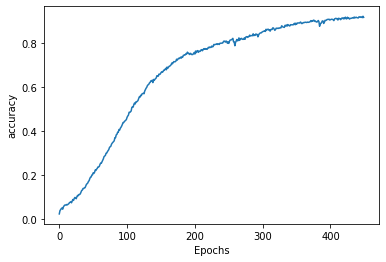

In [30]:
plot_graphs(history, 'accuracy')

In [31]:
seed_text = "harry said hello"
next_words = 15
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

harry said hello the wall of shame of rubber the day that they got floating immortality i speak
